In [2]:
using LinearAlgebra, Plots, FFTW, Statistics

# Vectorization (mathematics)

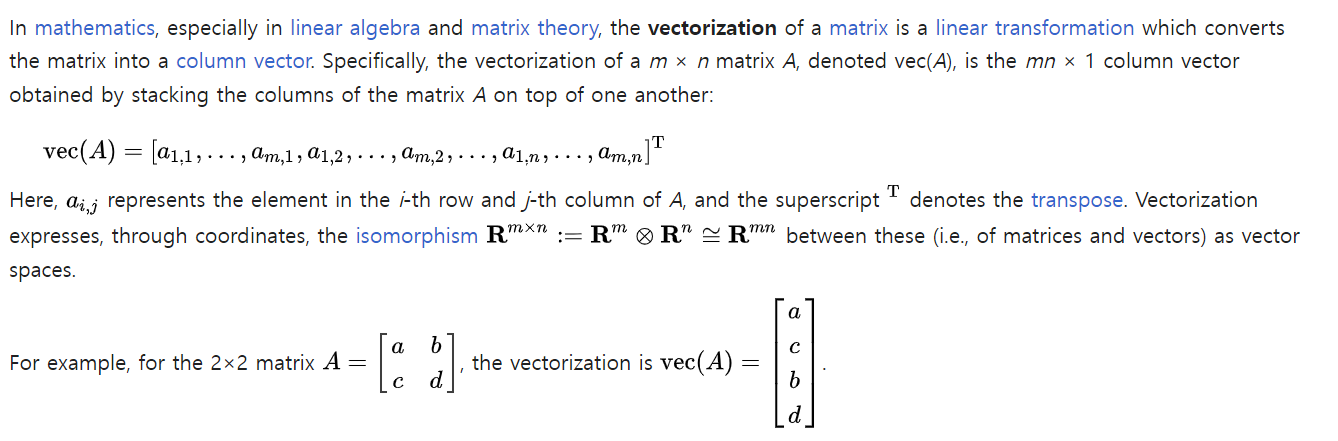

(예제)

In [3]:
A = [1 2
     3 4]

2×2 Matrix{Int64}:
 1  2
 3  4

In [4]:
vec(A)

4-element Vector{Int64}:
 1
 3
 2
 4

- $2\times2$ matrix $\bf{A}$가 $4\times1$의 컬럼벡터로 변한 것을 확인할 수 있다.

In [5]:
B = [1 2 3
     4 5 6]

2×3 Matrix{Int64}:
 1  2  3
 4  5  6

In [6]:
vec(B)  # 6x1 column vector

6-element Vector{Int64}:
 1
 4
 2
 5
 3
 6

## Kronecker product

크로네커곱의 정의는 아래와 같다.

$${\bf A} \otimes {\bf B}
=\begin{bmatrix}
a_{11}{\bf B} & a_{12}{\bf B} & \dots & a_{1m}{\bf B} \\ 
a_{21}{\bf B} & a_{22}{\bf B} & \dots & a_{2m}{\bf B} \\ 
\dots & \dots & \dots & \dots \\
a_{n1}{\bf B} & a_{n2}{\bf B} & \dots & a_{nm}{\bf B} \\ 
\end{bmatrix}$$

두 행렬 ${\bf A}_{m\times n}$, ${\bf B}_{p\times q}$의 크로네커곱 ${\bf A}\otimes {\bf B}$의 차원은 $mp \times nq$ 가 된다. 계산예시는 아래와 같다. 

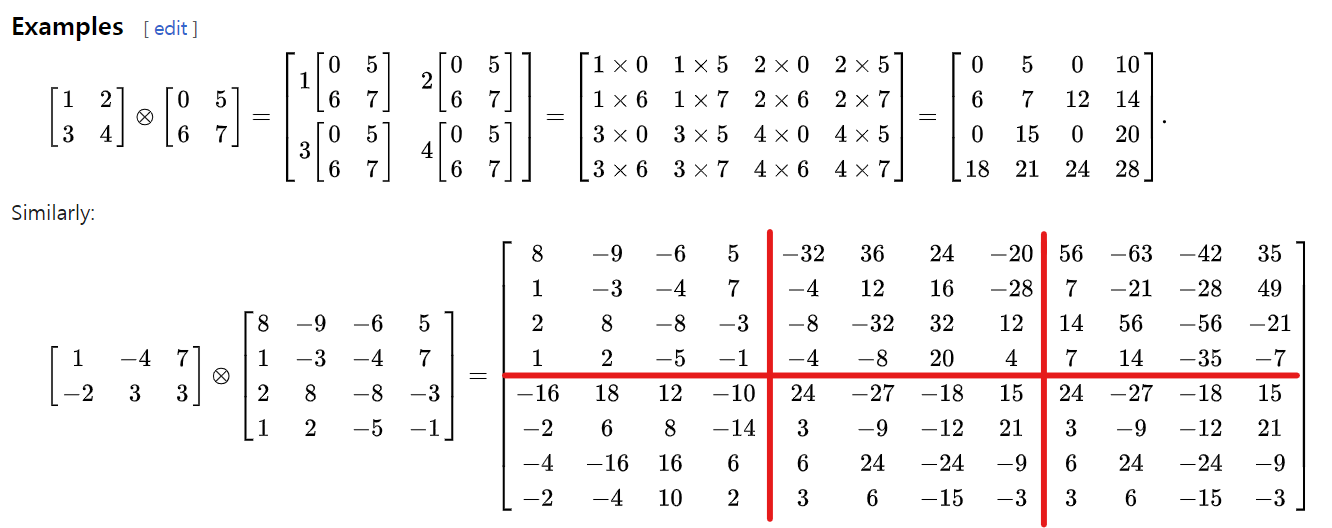

크로네커곱에 대한 성질들이 위키에 많이 있으니 참고하면 좋다.

(예제1)

In [7]:
A = [1 2
     3 4]
B = [0 5
     6 7]
C = kron(A,B)

4×4 Matrix{Int64}:
  0   5   0  10
  6   7  12  14
  0  15   0  20
 18  21  24  28

(예제2)

In [8]:
A = [1 -4 7; -2 3 3]
B = [8 -9 -6 -5; 1 -3 -4 7; 2 8 -8 -3; 1 2 -5 -1]
C = kron(A, B)

8×12 Matrix{Int64}:
   8   -9  -6   -5  -32   36   24   20  56  -63  -42  -35
   1   -3  -4    7   -4   12   16  -28   7  -21  -28   49
   2    8  -8   -3   -8  -32   32   12  14   56  -56  -21
   1    2  -5   -1   -4   -8   20    4   7   14  -35   -7
 -16   18  12   10   24  -27  -18  -15  24  -27  -18  -15
  -2    6   8  -14    3   -9  -12   21   3   -9  -12   21
  -4  -16  16    6    6   24  -24   -9   6   24  -24   -9
  -2   -4  10    2    3    6  -15   -3   3    6  -15   -3

## Khatri-Rao product

카트리-라오곱은 매트릭스 $\bf{A}$와 $\bf{B}$가 같은 차원의 [블락매트릭스](https://en.wikipedia.org/wiki/Block_matrix)로 정의될 때 각 서브매트릭스의 크로네커 곱으로 정의된다. 정의와 계산예시는 아래와 같다.

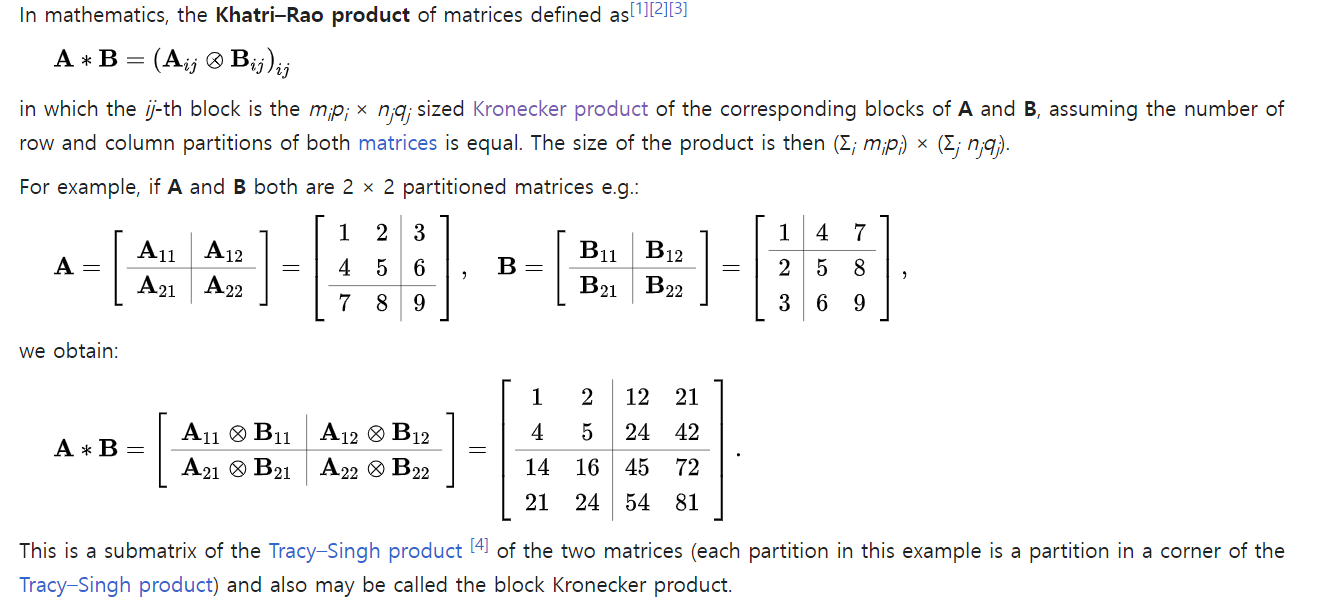

또 다른 계산예시는 아래와 같다. 이 예제는 중요하니까 직접 구현해보자.

## Column-Wise Kronecker product

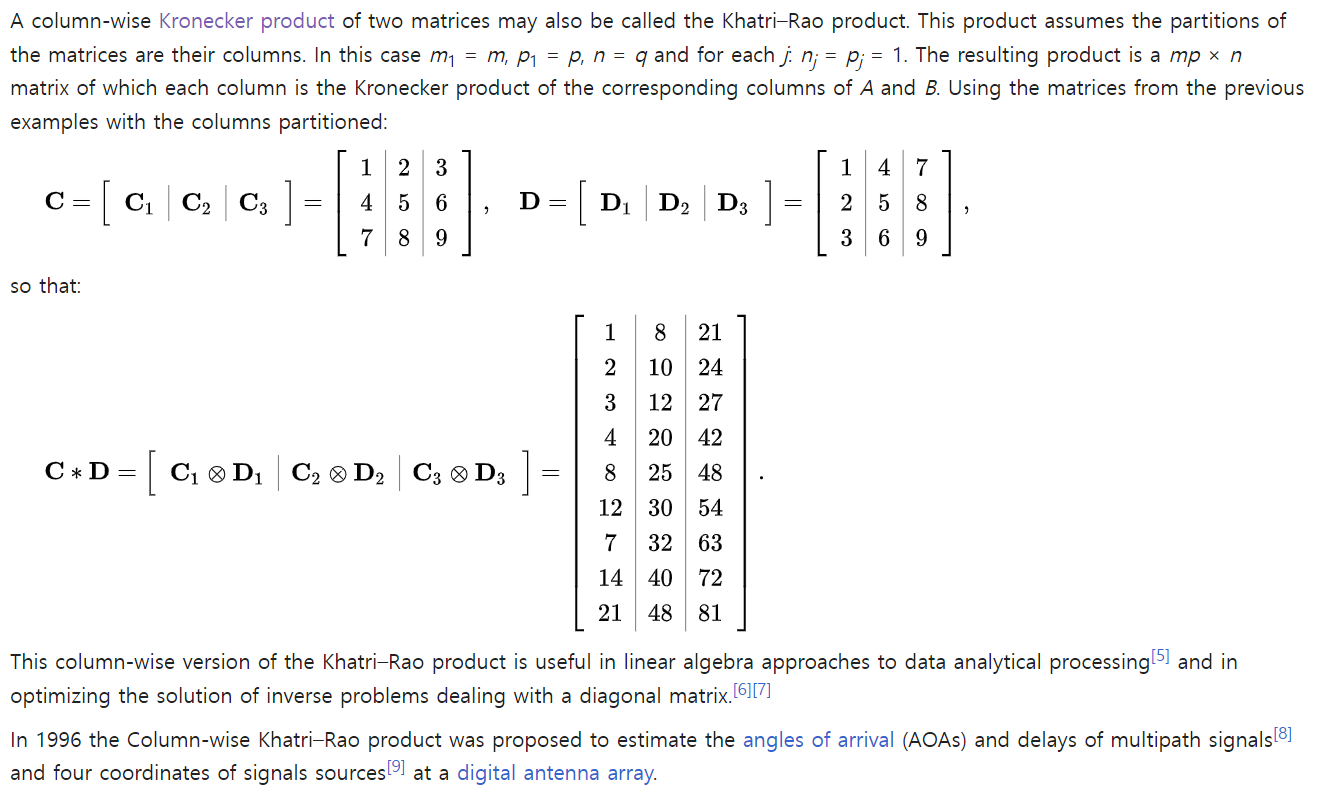

(예제1)

In [18]:
C = [1 2 3
     4 5 6
     7 8 9]

3×3 Matrix{Int64}:
 1  2  3
 4  5  6
 7  8  9

In [19]:
D = [1 4 7
     2 5 8
     3 6 9]

3×3 Matrix{Int64}:
 1  4  7
 2  5  8
 3  6  9

---

*Julia 문법*

-  `hcat` : The **hcat()** is inbuilt function in julia which is used to concatenate the given arrays along dimension 2.


In [14]:
# hcat exmple
a = [5; 10; 15; 20; 25]
b = [1 2; 3 4; 5 6; 7 8; 9 10]
hcat(a, b)

5×3 Matrix{Int64}:
  5  1   2
 10  3   4
 15  5   6
 20  7   8
 25  9  10

---

$\bf{C}*\bf{D} = [C_1\otimes D_1 | C_2 \otimes D_2 | C_3 \otimes D_3]$

In [20]:
hcat([kron(C[:,i],D[:,i]) for i in 1:3]...)

9×3 Matrix{Int64}:
  1   8  21
  2  10  24
  3  12  27
  4  20  42
  8  25  48
 12  30  54
  7  32  63
 14  40  72
 21  48  81

이건 자주 쓸일이 있을 것 같으니까 함수로 저장하자.

In [22]:
columnwise_kron = 
(C,D) -> hcat([kron(C[:,i],D[:,i]) for i in 1:size(C)[2]]...)

#3 (generic function with 1 method)

In [31]:
columnwise_kron(C, D)

9×3 Matrix{Int64}:
  1   8  21
  2  10  24
  3  12  27
  4  20  42
  8  25  48
 12  30  54
  7  32  63
 14  40  72
 21  48  81

## 그래프 표현

아래의 그림을 살펴보자.

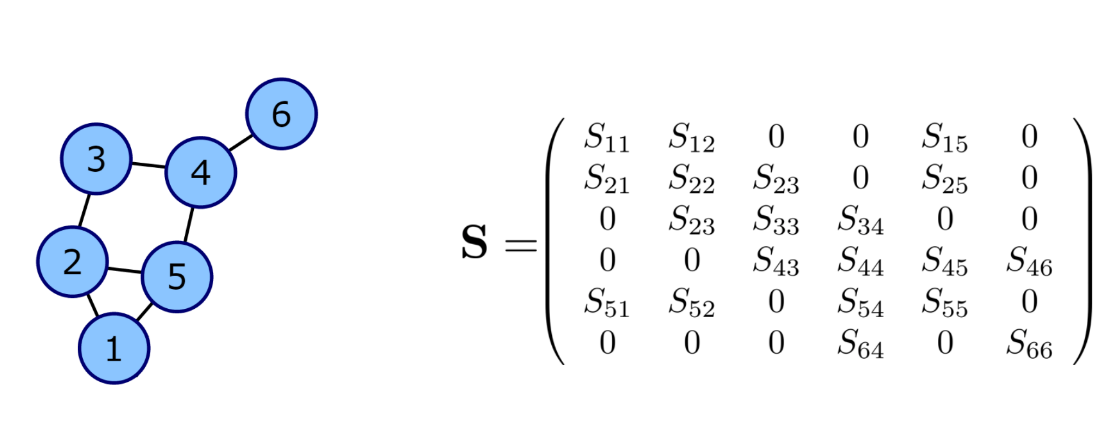

오른쪽 $\bf S$는 무시하고 왼쪽의 그래프만 살펴보자. 이 그림에는 $6$개의 노드가 있고 각각의 노드에는 저 마다의 연결구조를 가진다. 이러한 연결구조는 $\bf{G} = (\bf{N},\bf{E})$으로 표현할 수 있는데 여기에서 $\bf{N}$은 노드들의 집합이고, $\bf{E}$는 엣지^[노드 $i$에서 노드 $j$로 향하는 연결이 있다면 $(i,j)\in \cal{E}$이다.]들의 집합니다. 
보통 $\cal E$는 복잡하므로 연결정보를 매트릭스 $\bf{E}$로 표현하는데 이러한 $\bf{E}$를 인접행렬이라고 부른다. 인접행렬의 각 원소는 $E_{ij}= \begin{cases} 1 & (i,j) \in {\cal E} \\ 0 & o.w \end{cases}$ 와 같이 정의한다. 이 그림의 경우 ${\cal N}$ 와 ${\cal E}$, ${\bf E}$ 는 아래와 같다. 

- $\cal N = \{1, 2, 3, 4, 5, 6\}$

- ${\bf E}=\begin{bmatrix}
0 & 1 & 0 & 0 & 1 & 0 \\
1 & 0 & 1 & 0 & 1 & 0\\
0 & 1 & 0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 & 1 & 1 \\
1 & 1 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 
\end{bmatrix}$

- ${\cal E} = \{(i,j) : E_{ij}=1 \}$

## GSO (Graph Shift Operator)

후에 자세히 서술하겠지만 전통적인 시계열분석기법을 그래프신호로 확장하기 위해서는 단지 퓨리에변환 대신에 그래프퓨리에 변환을 사용하면 된다. 즉 퓨리에변환을 일반화한 그래프퓨리에 변환을 잘 정의하면 된다.

전통적인 신호처리 영역에서의 퓨리에변환은 시계열자료의 인접성을 의미하는 행렬 $\bf{B}$^[원래는 평행이동을 의미하는 행렬이지만, 이걸 인접성을 의미하는 행ㅇ렬로 해석할 수도 있다. 어차피 인접한 곳으로 이동할 수 있으니까]의 고유행렬의 켤레전치로 정의할 수 있다. 이를 이용하면 그래프 퓨리에변환은 그래프자료의 인접성을 의미하는 행렬^[예를들면 인접행렬 $\bf{E}$와 같은 행렬]의 고유행렬의 켤레전치로 정의할 수 있음을 유추할 수 있다. 즉, 비유클리드 자료에서도 $\bf{B}$에 대응하는 어떠한 매트릭스가 정의되어야 하는데 (그리고 이 매트릭스는 그래프자료의 인접성에 대한 정보가 있어야 한다.) 이 매트릭스를 $\bf{S}$라고 정의하고 **graph shift operator (GSO)** 라고 이름 붙인다.

주어진 그래프 $\cal{G} = (\cal{N}, \cal{E})$에 대하여 GSO $\bf S$는 $\bf{E} + \bf{I}$의 값이 1인 영역에만 값이 있는 어떠한 행렬이다. 다시 아래의 그림을 생각하여 보자.

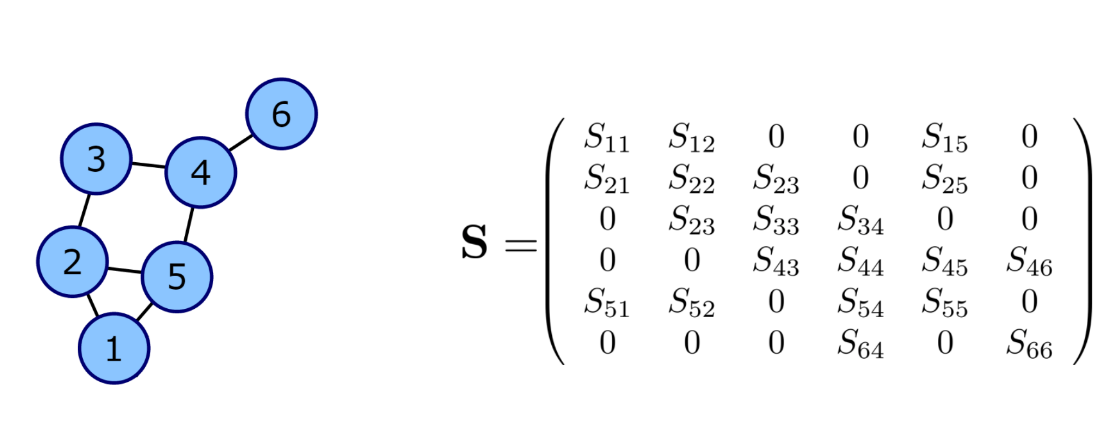

왼쪽 그래프의 GSO는 오른쪽과 같은 행렬 $\bf S$가 된다. 이제 $\bf S$의 고유벡터행렬을 구한 뒤에 그것의 켤레전치를 $\bf{GFT}$ 행렬로 정의하면 될 것 같다.문제는 "$\bf{S}$의 고유벡터행렬이 항상 존재하는가?"인데, 사실 이게 항상 존재한다는 보장이 없다. 즉 $\bf{S}$의 고유벡터 행렬이 존재 안할 수도 있다. 따라서 GSO $\bf{S}$가 고유분해가능하다는 조건이 추가적으로 필요한데 이러한 조건을 만족하는 GSO를 normal GSO라고 부른다. 우리는 당연히 normal GSO에 대해서만 관심이 있으므로 앞으로 특별한 언급이 없는 한 GSO는 모두 normal GSO라고 가정한다.

# 12.2.1 Power Spectral Density

(넘어가....)

# 12.2.3 Power Spectral Density Estimators

(일단 패스...)

# 12.3.1 Nonparametric PSD estimators

(일단 패스...)

# Summary

## 정상시계열을 분석한흔 두 가지 흐름, ACF와 PSD

### 전통적인 분석방법

클래식한 정상시계열은 유한차수의 ARMA로 근사할 수 있음이 알려져 있다. 유한차수의 ARMA의 계수 $p,q$를 적절하게 추정하기 위해서는 시계열 $\bf x$를 SACF plot 혹은 SPACF plot을 이용하면 된다. 이때 SACF 혹은 SPACF의 그림을 살펴보고 적절한 모형을 선택하기 위해서는 유한차수 ARMA의 이론적 ACF의 모양을 알면 되는데, 이를 바꾸어서 말하면 결국 정상시계열 $\bf x$의 모든 정보는 ACF에 들어가있다는 의미가 된다. 즉 정상시계열은 ACF만 잘 추정함녀 모든 것이 해결된다.

그런데 ACF의 모든 정보는 다시 아래의 행렬에 들어있다.

$${\bf C}_{\bf x}=\mathbb{E}[{\bf x}{\bf x}^T]$$

여기에는 $\bf x$는 relization이 아니라 확률벡터를 의미함을 유의하자. 따라서 정상시계열의 경우 $\bf{C}_x$를 잘 추정하면 모든것이 잘 해결된다고 생각하면 된다.

> 참고: 정상시계열의 경우 ACF 만 정확하게 알아도 (반대로 PACF만 정확하게 알아도) 이론상 모든 모형을 특정할 수 있다. 즉 정상시계열의 모형을 특정하기 위해서는 ACF plot, PACF plot 하나만 있어도 충분하다. (Wold’s Thm은 떠올리면 모든 정상시계열은 무한MA로 유니크하게 표현할 수 있는데, 이는 PACF plot을 가지고 모든 정상시계열을 유니크하게 특정할 수 있다는 것을 의미한다) 다만 좀 더 모형을 특정하는 과정을 용이하게 하기 위해서 실전에서는 SACF plot 과 SPACF plot 을 함께 보는 것이 유리하다.

**(예제) AR(1) 모형**

왜 ACF의 모든 정보를 $\bf{C}_x$ 로부터 알 수 있는지 코드를 통하여 실습하여 보자.

아래의 모형을 가정하자.

$$x_t = 0.5x_{t-1} + \epsilon_t$$

여기에서 $\epsilon_t$는 서로 독립인 표준정규분포를 따른다. 이 모형에서 길이가 100인 시계열을 임으로 발생시키자.

In [85]:
x = zeros(100*1)
x[1] = randn()
for t in 2:100
    x[t] = 0.5*x[t-1] + randn()
end

모형에서 생성된 하나의 시계열을 시각화하면 아래와 같다.

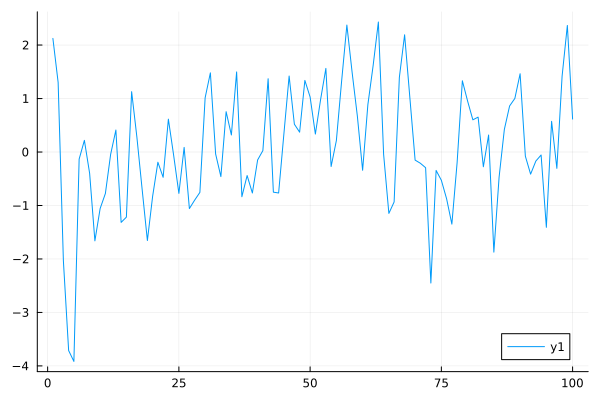

In [86]:
plot(x)

**lag=1일 경우 시계열의 SACF를 계산하면 아래와 같다.**

In [87]:
x[1:99] .* x[2:100]

99-element Vector{Float64}:
  2.763927872349466
 -2.648382063879747
  7.5560713885953215
 14.538881990615415
  0.520289725235592
 -0.02893028852363918
 -0.08713887236919443
  0.664714967484797
  1.7558767596344267
  0.8198605801110912
  0.03431855113914528
 -0.01819122449351602
 -0.5411309265124012
  ⋮
  0.8627760724036734
  1.4665215311182225
 -0.11299501148861134
  0.03195980896825844
  0.0699424007664186
  0.009424426205167391
  0.07855903160522548
 -0.8085731251113174
 -0.17558999208627857
 -0.4339226145863137
  3.357684099650187
  1.4577818358298857

- 이 계산결과는 각 $t$에 대하여 $x_{t-1}x_t$를 계산한 것과 같다.

이 수열들의 평균은 아래와 같다.

In [88]:
x[1:99] .* x[2:100] |> mean

0.6460152065947437

- 이 계산결과는 $\frac{1}{99}\sum_{t=2}^{100}x_{t-1}x_t$를 계산한 것과 같다.

이론적인 값인 0.5 근처의 값이 잘 나옴을 알 수 있다???? 뭔가 잘못했나.. $0.5$근처라고 해도 되나..?

**lag=2일 경우도 마찬가지로 구할 수 있다.**

In [89]:
x[1:98] .* x[3:100] |> mean

0.017848962875704446

그런데 이러한 숫자들은  $\bf{x}\bf{x}^\top$를 이용해서도 구할 수 있다.

In [90]:
x*x'

100×100 Matrix{Float64}:
  4.51193    2.76393    -4.32331    …   3.01347     5.02729    1.30834
  2.76393    1.69313    -2.64838        1.846       3.07963    0.801466
 -4.32331   -2.64838     4.14257       -2.8875     -4.81713   -1.25364
 -7.88573   -4.83066     7.55607       -5.26681    -8.78647   -2.28665
 -8.31861   -5.09584     7.97085       -5.55593    -9.26879   -2.41218
 -0.2822    -0.172871    0.270402   …  -0.188479   -0.314433  -0.0818304
  0.46255    0.28335    -0.443213       0.308933    0.515384   0.134127
 -0.849993  -0.520691    0.814459      -0.567703   -0.947083  -0.246476
 -3.52843   -2.16146     3.38093       -2.35661    -3.93146   -1.02315
 -2.2453    -1.37543     2.15143       -1.49961    -2.50176   -0.651077
 -1.64751   -1.00924     1.57864    …  -1.10036    -1.83569   -0.477734
 -0.093986  -0.0575742   0.0900569     -0.0627724  -0.104721  -0.0272534
  0.873295   0.534965   -0.836787       0.583266    0.973046   0.253232
  ⋮                                 ⋱     

여기에서 각 원소들이 의미하는 바는 아래와 같다.

- 대각선의 원소: $x_t^2, \space t=1,2,\dots,100$을 의미
- 대각선 한칸 위, 혹은 한칸 아래: $x_{t-1}x_t,\space t=2,3,\dots,100$을 의미
- 대각선 두칸 위, 혹은 두칸 아래: $x_{t-1}x_t, \space t=3,4,\dots 100$을 의미

In [101]:
x[1:5]

5-element Vector{Float64}:
  2.1241294211140476
  1.301205023044152
 -2.0353303414736996
 -3.712454550804897
 -3.916245112674374

In [103]:
x'

1×100 adjoint(::Vector{Float64}) with eltype Float64:
 2.12413  1.30121  -2.03533  -3.71245  …  1.41869  2.36675  0.615941

$\begin{bmatrix} \end{bmatrix}$

In [108]:
2.1241294211140476^2, 1.301205023044152^2, (-2.0353303414736996)^2 ## 대각선 원소

(4.511925797642299, 1.6931345119953323, 4.142569598923447)

**lag1**

In [96]:
(x[1:99] .* x[2:100])[1:5]

5-element Vector{Float64}:
  2.763927872349466
 -2.648382063879747
  7.5560713885953215
 14.538881990615415
  0.520289725235592